<a href="https://colab.research.google.com/github/JPWinterFrankJr/Analise_Dados/blob/main/empresas_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_dados=pd.read_csv('Startups+in+2021+end.csv') #ler arquivo

base_dados.shape #ver linhas e colunas

(936, 8)

In [ ]:
base_dados.head() #ver os primeiros registros


,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
base_dados.columns #verificar colunas que tem


Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
base_dados.info() #verificar tipo de informação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#verificar quantos campos nulos eu tenho
base_dados.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [ ]:
#campos unicos
base_dados.nunique()

Unnamed: 0          936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

In [ ]:
#verificar valores unicos
base_dados['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

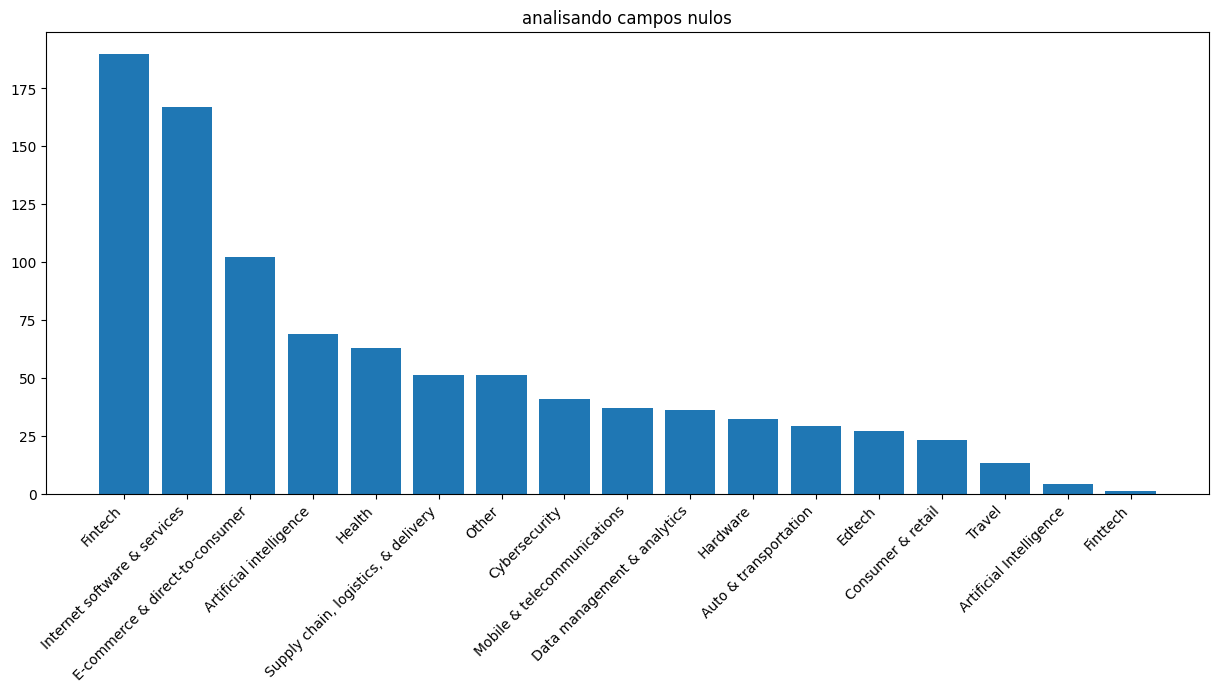

In [ ]:
#a Industria que mais se faz unicornio 
plt.figure(figsize=(15,6))
plt.title('analisando campos nulos')
plt.bar(base_dados['Industry'].value_counts().index, base_dados['Industry'].value_counts())
plt.xticks(rotation=45, ha='right');

In [ ]:
#quantidade de startups por pais
base_dados['Country'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [ ]:
#passar para porcentagem
analise= round (base_dados['Country'].value_counts(normalize=True)*100)
analise

United States           51.0
China                   18.0
India                    5.0
United Kingdom           4.0
Germany                  2.0
Israel                   2.0
France                   2.0
Canada                   2.0
Brazil                   2.0
South Korea              1.0
Singapore                1.0
Hong Kong                1.0
Japan                    1.0
Australia                1.0
Mexico                   1.0
Netherlands              1.0
Indonesia                0.0
Spain                    0.0
Sweden                   0.0
Switzerland              0.0
Ireland                  0.0
United Arab Emirates     0.0
Norway                   0.0
Belgium                  0.0
Thailand                 0.0
Denmark                  0.0
Philippines              0.0
Finland                  0.0
Colombia                 0.0
South Africa             0.0
Turkey                   0.0
Austria                  0.0
Chile                    0.0
Malaysia                 0.0
Czech Republic

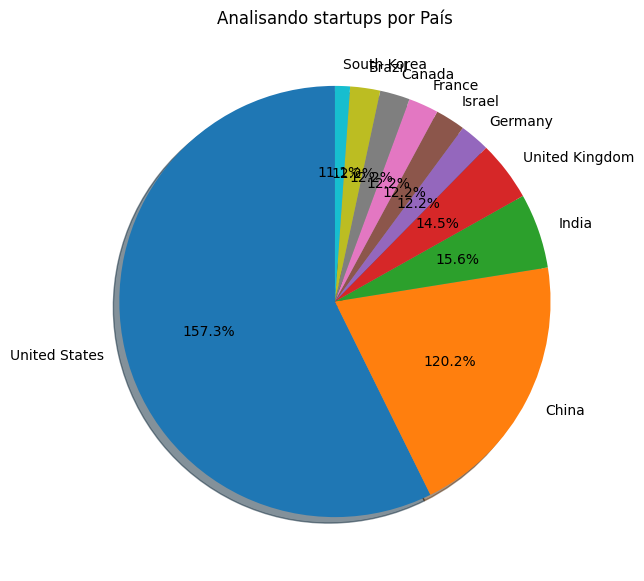

In [ ]:
#grafico de pizza quantidade de startups por pais
plt.figure(figsize=(16,7))
plt.title('Analisando startups por País')
plt.pie(
    analise.head(10), #pegar 10
    labels=analise.index[0:10], #pegar o top 10
    shadow=True,
    startangle=90,
    autopct='1%.1f%%');

In [ ]:
#pedir ao pandas transformar a coluna data em formato data
base_dados['Date Joined']= pd.to_datetime(base_dados['Date Joined'])
base_dados['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [ ]:
#extrair ano e mes
base_dados['Month'] = pd.DatetimeIndex(base_dados['Date Joined']).month
base_dados['Year'] = pd.DatetimeIndex(base_dados['Date Joined']).year

In [ ]:
#Analise de startups por ano
base_dados.groupby(by=['Country','Year']).count()['Unnamed: 0']



Country         Year
Argentina       2021      1
Australia       2018      1
                2019      1
                2021      4
Austria         2021      2
                       ... 
United States   2019     48
                2020     64
                2021    279
United States,  2021      1
Vietnam         2021      1
Name: Unnamed: 0, Length: 129, dtype: int64

In [ ]:
#tabela analitica
analise_agrupada=base_dados.groupby(by=['Country','Year','Company']).count()['Unnamed: 0'].reset_index()
analise_agrupada

,Country,Year,Company,Unnamed: 0
0,Argentina,2021,Uala,1
1,Australia,2018,Canva,1
2,Australia,2019,Airwallex,1
3,Australia,2021,Culture Amp,1
4,Australia,2021,GO1,1
...,...,...,...,...
931,United States,2021,candy.com,1
932,United States,2021,dbt Labs,1
933,United States,2021,iCapital Network,1
934,"United States,",2021,TrialSpark,1


In [ ]:
#descobrir país especifico
analise_agrupada.loc[
    analise_agrupada['Country'] == 'Brazil'
]

,Country,Year,Company,Unnamed: 0
12,Brazil,2018,Movile,1
13,Brazil,2018,Nubank,1
14,Brazil,2018,iFood,1
15,Brazil,2019,EBANX,1
16,Brazil,2019,Loggi,1
17,Brazil,2019,QuintoAndar,1
18,Brazil,2019,Wildlife Studios,1
19,Brazil,2020,C6 Bank,1
20,Brazil,2020,Creditas,1
21,Brazil,2020,Loft,1


In [ ]:
#tranformei valor em float
base_dados['Valuation ($B)']=pd.to_numeric(base_dados['Valuation ($B)'].apply(lambda Linha: Linha.replace('$','')))

In [ ]:

base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#tabela analitica
analise_pais=base_dados.groupby( by=['Country'] ).sum()['Valuation ($B)'].reset_index()
analise_pais.head()

<ipython-input-134-443f38901c27>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  analise_pais=base_dados.groupby( by=['Country'] ).sum()['Valuation ($B)'].reset_index()


,Country,Valuation ($B)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [ ]:
#pais que mais gerou valor com startups em ordem decrescente
analise_pais.sort_values('Valuation ($B)', ascending=False)

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45
